# Template Translation Detection of Egyptian Articles

## Unsupervised Clustering Algorithms:

### K-Means:

In [1]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

df = pd.read_csv("../../Experimental-Setups/arzwiki-20240101-all-20k.csv")
df

,page_title,total_edits,total_editors,total_bytes,total_chars,total_words,page_text,page_text_cleaned,label
0,كريستينا نوير,27,6,1685,460,65,كريستينا نوير christina noir يوليه ممثلة بورنو...,كريستينا نوير يوليه ممثلة بورنوجرافية امريكية ...,human-generated
1,ارنست هيفليجر,2,2,1060,381,67,ارنست هيفليجر كان معلم موسيقى مغنى اوبرا مغنى ...,ارنست هيفليجر كان معلم موسيقى مغنى اوبرا مغنى ...,template-translated
2,ناديه مصطفى,19,8,1841,637,113,نادية مصطفى اكتوبر مغنية مصرية بدأت مشوارها ال...,نادية مصطفى اكتوبر مغنية مصرية بدأت مشوارها ال...,human-generated
3,جامعات عمان,10,6,1810,767,113,الجامعات ومؤسسات التعليم العالي فى سلطنه عمان ...,الجامعات ومؤسسات التعليم العالي فى سلطنه عمان ...,human-generated
4,الحرب السكندريه,51,16,12077,6192,1083,يوليوس قيصر خاض حرب اسكندريه الحرب السكندريه ح...,يوليوس قيصر خاض حرب اسكندريه الحرب السكندريه ح...,human-generated
...,...,...,...,...,...,...,...,...,...
19995,عبد الخالق صالح,12,5,1070,467,81,عبدالخالق صالح abdelkhalek saleh ممثل مصرى من ...,عبدالخالق صالح ممثل مصرى من مواليد تخرج فى كلي...,human-generated
19996,چيم رونى,4,2,916,301,53,چيم رونى لاعب كورة قدم من المملكه المتحده حيات...,چيم رونى لاعب كورة قدم من المملكه المتحده حيات...,template-translated
19997,البطوله الوطنيه الاولى 1963,2,2,872,315,51,البطوله الوطنيه الاولى országos bajnokság هوا ...,البطوله الوطنيه الاولى هوا موسم رياضى فى كورة ...,template-translated
19998,دايان لين,13,7,1157,350,59,دايان لين بسنة دايان لين هيا ممثله امريكيه اتو...,دايان لين بسنة دايان لين هيا ممثله امريكيه اتو...,human-generated


#### Input Features:

In [2]:
import json
import numpy as np
import pandas as pd

def fetch_embeddings(page_text, dataframe_name, embeddings_file):
    idx = np.where(dataframe_name["page_text_cleaned"] == page_text)[0][0]
    page_title = dataframe_name['page_title'][idx]
    return embeddings_file[page_title]
    
embeddings_files = ["../../Experimental-Setups/arzwiki-20240101-all-20k-sparknlp-embeddings.json", 
                   "../../Experimental-Setups/arzwiki-20240101-all-20k-camelbert-embeddings.json"]

for file in embeddings_files:
    with open(file) as json_file:
        fetched_page_text_embeddings = json.load(json_file)
        df[f'{file.split("/")[-1].split("-")[-2]}_page_text_embeddings'] = df['page_text_cleaned'].apply(lambda page_text: fetch_embeddings(page_text, df, fetched_page_text_embeddings))

df['label'] = df['label'].map({'template-translated': 1, 'human-generated': 0})

df

,page_title,total_edits,total_editors,total_bytes,total_chars,total_words,page_text,page_text_cleaned,label,sparknlp_page_text_embeddings,camelbert_page_text_embeddings
0,كريستينا نوير,27,6,1685,460,65,كريستينا نوير christina noir يوليه ممثلة بورنو...,كريستينا نوير يوليه ممثلة بورنوجرافية امريكية ...,0,"[-0.01276949152542373, 0.00048644067796609894,...","[0.9345402717590332, -0.23156806826591492, 1.0..."
1,ارنست هيفليجر,2,2,1060,381,67,ارنست هيفليجر كان معلم موسيقى مغنى اوبرا مغنى ...,ارنست هيفليجر كان معلم موسيقى مغنى اوبرا مغنى ...,1,"[-0.0033208955223880602, -0.04084029850746269,...","[1.1935014724731445, -0.4615197479724884, 0.74..."
2,ناديه مصطفى,19,8,1841,637,113,نادية مصطفى اكتوبر مغنية مصرية بدأت مشوارها ال...,نادية مصطفى اكتوبر مغنية مصرية بدأت مشوارها ال...,0,"[0.004411607142857147, -0.025443750000000008, ...","[1.0213305950164795, -0.9650395512580872, 0.87..."
3,جامعات عمان,10,6,1810,767,113,الجامعات ومؤسسات التعليم العالي فى سلطنه عمان ...,الجامعات ومؤسسات التعليم العالي فى سلطنه عمان ...,0,"[0.0031707964601769916, -0.0018451327433628292...","[0.8735443353652954, -1.340850591659546, 0.825..."
4,الحرب السكندريه,51,16,12077,6192,1083,يوليوس قيصر خاض حرب اسكندريه الحرب السكندريه ح...,يوليوس قيصر خاض حرب اسكندريه الحرب السكندريه ح...,0,"[0.014313826679649486, -0.013468354430379716, ...","[1.1119786500930786, -0.9848897457122803, 0.63..."
...,...,...,...,...,...,...,...,...,...,...,...
19995,عبد الخالق صالح,12,5,1070,467,81,عبدالخالق صالح abdelkhalek saleh ممثل مصرى من ...,عبدالخالق صالح ممثل مصرى من مواليد تخرج فى كلي...,0,"[0.0005721518987341762, -0.0007936708860759519...","[0.8878637552261353, -0.8799211382865906, 0.71..."
19996,چيم رونى,4,2,916,301,53,چيم رونى لاعب كورة قدم من المملكه المتحده حيات...,چيم رونى لاعب كورة قدم من المملكه المتحده حيات...,1,"[-0.02443921568627451, -0.016590196078431377, ...","[0.9044078588485718, -0.4501630961894989, 0.39..."
19997,البطوله الوطنيه الاولى 1963,2,2,872,315,51,البطوله الوطنيه الاولى országos bajnokság هوا ...,البطوله الوطنيه الاولى هوا موسم رياضى فى كورة ...,1,"[-0.01403829787234042, -0.03250425531914894, 0...","[1.0202338695526123, -0.8164071440696716, 0.46..."
19998,دايان لين,13,7,1157,350,59,دايان لين بسنة دايان لين هيا ممثله امريكيه اتو...,دايان لين بسنة دايان لين هيا ممثله امريكيه اتو...,0,"[-0.026108620689655172, -0.008184482758620692,...","[0.8501976728439331, -0.6579734086990356, 0.60..."


#### Ablations:

In [3]:
import pandas as pd

def prepare_meta_features(df, features):
    if features == "metadata1":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_edits'][i])    # 1
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata2":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_editors'][i])  # 2
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata3":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_bytes'][i])    # 3
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata4":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_chars'][i])    # 4
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata5":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_words'][i])    # 5
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata1+2":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_edits'][i])    # 1
            x.append(df['total_editors'][i])  # 2
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata3+4+5":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_bytes'][i])    # 3
            x.append(df['total_chars'][i])    # 4
            x.append(df['total_words'][i])    # 5
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    elif features == "metadata_all":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_edits'][i])    # 1
            x.append(df['total_editors'][i])  # 2
            x.append(df['total_bytes'][i])    # 3
            x.append(df['total_chars'][i])    # 4
            x.append(df['total_words'][i])    # 5
            X.append(x) 
        y = df['label'].to_list()
        return X, y

    else: 
        print("Error: Choose Features: Metadata 1 to 5, Metadata 1+2, Metadata 3+4+5, Metadata All")
        pass

##### FEATURE=METADATA1 #####

Silhouette Coefficient Score*100: 82.68 (+/- 0.00) 



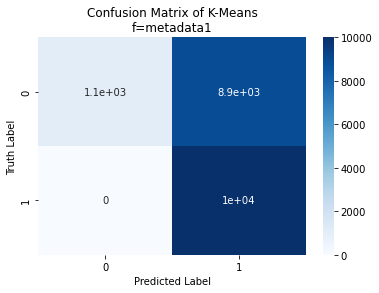



##### FEATURE=METADATA2 #####

Silhouette Coefficient Score*100: 78.32 (+/- 0.00) 



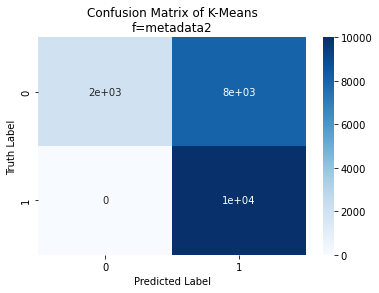



##### FEATURE=METADATA3 #####

Silhouette Coefficient Score*100: 97.10 (+/- 0.00) 



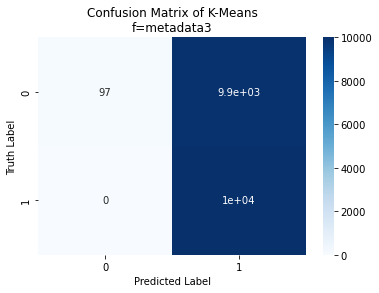



##### FEATURE=METADATA4 #####

Silhouette Coefficient Score*100: 96.46 (+/- 0.00) 



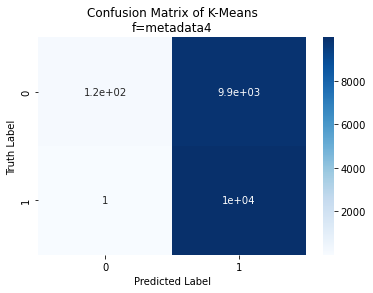



##### FEATURE=METADATA5 #####

Silhouette Coefficient Score*100: 96.39 (+/- 0.00) 



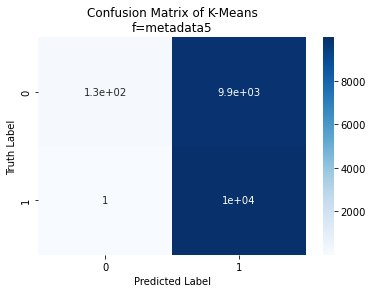



##### FEATURE=METADATA1+2 #####

Silhouette Coefficient Score*100: 81.77 (+/- 0.00) 



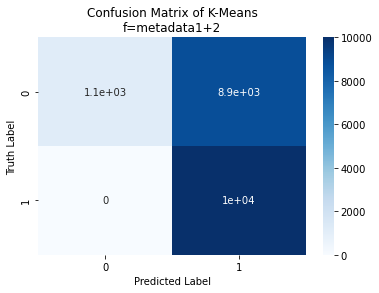



##### FEATURE=METADATA3+4+5 #####

Silhouette Coefficient Score*100: 96.89 (+/- 0.00) 



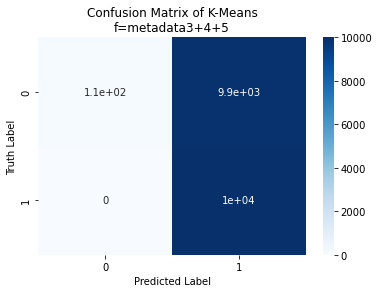



##### FEATURE=METADATA_ALL #####

Silhouette Coefficient Score*100: 96.89 (+/- 0.00) 



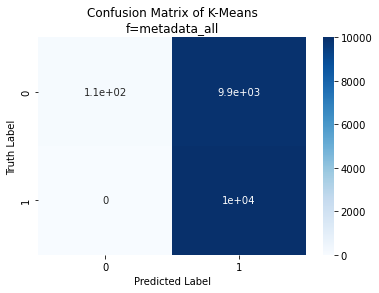

In [4]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

features = ["metadata1", "metadata2", "metadata3", "metadata4", "metadata5", "metadata1+2", "metadata3+4+5", "metadata_all"]

for feature in features:

    print(f"##### FEATURE={feature.upper()} #####\n")
    X, y = prepare_meta_features(df, features=feature)
    
    k_mean_classifier = KMeans(n_clusters=2, random_state=2024)
    k_mean_classifier.fit(X)
    k_labels = k_mean_classifier.labels_

    silhouette_score = metrics.silhouette_score(X, k_labels, metric='euclidean')*100
    print("Silhouette Coefficient Score*100: %0.2f (+/- %0.2f)" % (silhouette_score, silhouette_score.std() * 2), "\n")

    k_labels_matched = np.empty_like(k_labels)
    
    for k in np.unique(k_labels):
        match_nums = [np.sum((k_labels==k)*(y==t)) for t in np.unique(y)]
        k_labels_matched[k_labels==k] = np.unique(y)[np.argmax(match_nums)]

    cm = confusion_matrix(y, k_labels_matched)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.title(f'Confusion Matrix of K-Means\nf={feature}')
    plt.xlabel("Predicted Label")
    plt.ylabel("Truth Label")
    plt.savefig(f"plots/kms_cm_{feature}.png", bbox_inches='tight', dpi=100, facecolor='white', transparent=False)
    plt.show()

    print("\n")

#### Results:

In [5]:
import numpy as np
import pandas as pd

def prepare_features(df, features, model=None):
    if features == "metadata":
        X = []
        for i in range(df.shape[0]):
            x = []
            x.append(df['total_edits'][i])
            x.append(df['total_editors'][i])
            x.append(df['total_bytes'][i])
            x.append(df['total_chars'][i])
            x.append(df['total_words'][i])
            X.append(x) # Only page_metadata
        y = df['label'].to_list()
        return X, y

    elif features == "embeddings":
        if model == "sparknlp":
            X = []
            for i in range(df.shape[0]):
                x = []
                X.append(df['sparknlp_page_text_embeddings'].to_list()[i]) # Only page_text_embeddings
            y = df['label'].to_list()
            return X, y
        
        elif model == "camelbert":
            X = []
            for i in range(df.shape[0]):
                x = []
                X.append(df['camelbert_page_text_embeddings'].to_list()[i]) # Only page_text_embeddings
            y = df['label'].to_list()
            return X, y
        
        else: 
            print("Error: Choose An Embedding Model: SparkNLP or CAMeLBERT")
            pass
            
    elif features == "metadata+embeddings":
        if model == "sparknlp":
            X = []
            for i in range(df.shape[0]):
                x = []
                x.append(df['total_edits'][i])
                x.append(df['total_editors'][i])
                x.append(df['total_bytes'][i])
                x.append(df['total_chars'][i])
                x.append(df['total_words'][i])
                X.append(np.hstack([x, df['sparknlp_page_text_embeddings'].to_list()[i]])) # Both page_metadata + page_text_embeddings
            y = df['label'].to_list()
            return X, y
        
        elif model == "camelbert":
            X = []
            for i in range(df.shape[0]):
                x = []
                x.append(df['total_edits'][i])
                x.append(df['total_editors'][i])
                x.append(df['total_bytes'][i])
                x.append(df['total_chars'][i])
                x.append(df['total_words'][i])
                X.append(np.hstack([x, df['camelbert_page_text_embeddings'].to_list()[i]])) # Both page_metadata + page_text_embeddings
            y = df['label'].to_list()
            return X, y
  
    else: 
        print("Error: Choose Features: Metadata, Embeddings, or Metadata+Embeddings")
        pass

##### FEATURE=METADATA, MODEL=NONE #####

Silhouette Coefficient Score*100: 96.89 (+/- 0.00) 



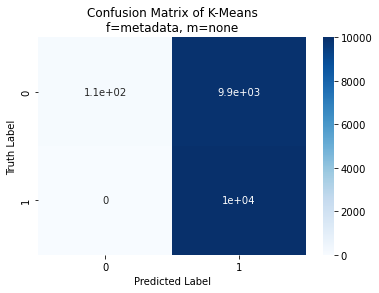



##### FEATURE=EMBEDDINGS, MODEL=SPARKNLP #####

Silhouette Coefficient Score*100: 12.50 (+/- 0.00) 



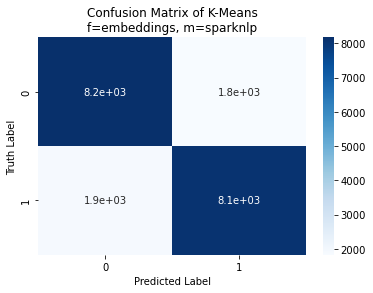



##### FEATURE=EMBEDDINGS, MODEL=CAMELBERT #####

Silhouette Coefficient Score*100: 14.95 (+/- 0.00) 



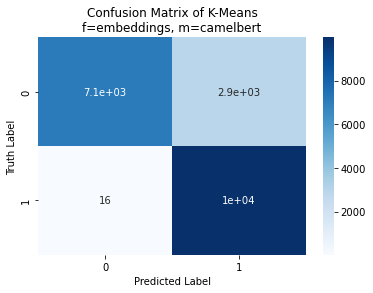



##### FEATURE=METADATA+EMBEDDINGS, MODEL=SPARKNLP #####

Silhouette Coefficient Score*100: 96.89 (+/- 0.00) 



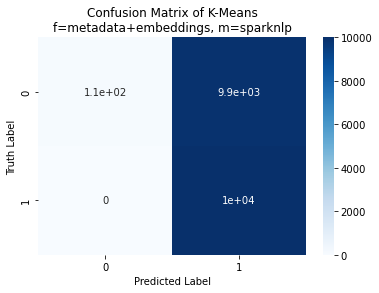



##### FEATURE=METADATA+EMBEDDINGS, MODEL=CAMELBERT #####

Silhouette Coefficient Score*100: 96.89 (+/- 0.00) 



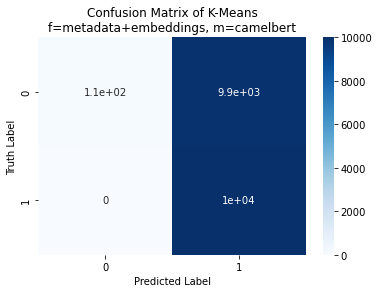

In [6]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

feature, model = "metadata", "none"

print(f"##### FEATURE={feature.upper()}, MODEL={model.upper()} #####\n")

X, y = prepare_features(df, features=feature, model=model)

k_mean_classifier = KMeans(n_clusters=2, random_state=2024)
k_mean_classifier.fit(X)
k_labels = k_mean_classifier.labels_

silhouette_score = metrics.silhouette_score(X, k_labels, metric='euclidean')*100
print("Silhouette Coefficient Score*100: %0.2f (+/- %0.2f)" % (silhouette_score, silhouette_score.std() * 2), "\n")

k_labels_matched = np.empty_like(k_labels)

for k in np.unique(k_labels):
    match_nums = [np.sum((k_labels==k)*(y==t)) for t in np.unique(y)]
    k_labels_matched[k_labels==k] = np.unique(y)[np.argmax(match_nums)]

cm = confusion_matrix(y, k_labels_matched)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title(f'Confusion Matrix of K-Means\nf={feature}, m={model}')
plt.xlabel("Predicted Label")
plt.ylabel("Truth Label")
plt.savefig(f"plots/kms_cm_{feature}_{model}.png", bbox_inches='tight', dpi=100, facecolor='white', transparent=False)
plt.show()

print("\n")

features = ["embeddings", "metadata+embeddings"]
models = ["sparknlp", "camelbert"]

for feature in features:

    for model in models:

        print(f"##### FEATURE={feature.upper()}, MODEL={model.upper()} #####\n")
        X, y = prepare_features(df, features=feature, model=model)
        
        k_mean_classifier = KMeans(n_clusters=2, random_state=2024)
        k_mean_classifier.fit(X)
        k_labels = k_mean_classifier.labels_
    
        silhouette_score = metrics.silhouette_score(X, k_labels, metric='euclidean')*100
        print("Silhouette Coefficient Score*100: %0.2f (+/- %0.2f)" % (silhouette_score, silhouette_score.std() * 2), "\n")
    
        k_labels_matched = np.empty_like(k_labels)
        
        for k in np.unique(k_labels):
            match_nums = [np.sum((k_labels==k)*(y==t)) for t in np.unique(y)]
            k_labels_matched[k_labels==k] = np.unique(y)[np.argmax(match_nums)]
    
        cm = confusion_matrix(y, k_labels_matched)
        sns.heatmap(cm, annot=True, cmap='Blues')
        plt.title(f'Confusion Matrix of K-Means\nf={feature}, m={model}')
        plt.xlabel("Predicted Label")
        plt.ylabel("Truth Label")
        plt.savefig(f"plots/kms_cm_{feature}_{model}.png", bbox_inches='tight', dpi=100, facecolor='white', transparent=False)
        plt.show()
        
        print("\n")